In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import poligrain as plg
import mergeplg as mplg
import mergeplg.class_structure_of_interpolators as mplg_new

In [3]:
ds_gauges = xr.open_dataset("./data/openmrg_municp_gauge.nc")
ds_cmls = xr.open_dataset("./data/openmrg_cml.nc")
ds_rad = xr.open_dataset("./data/openmrg_rad.nc")
ds_gauges_smhi = xr.open_dataset("./data/openmrg_smhi_gauge.nc")


ref_str = "EPSG:32632"
ds_gauges.coords["x"], ds_gauges.coords["y"] = plg.spatial.project_point_coordinates(
    ds_gauges.lon, ds_gauges.lat, ref_str
)

ds_gauges_smhi.coords["x"], ds_gauges_smhi.coords["y"] = (
    plg.spatial.project_point_coordinates(
        ds_gauges_smhi.lon, ds_gauges_smhi.lat, ref_str
    )
)

# Projected radar coords
ds_rad.coords["xs"], ds_rad.coords["ys"] = plg.spatial.project_point_coordinates(
    ds_rad.longitudes, ds_rad.latitudes, ref_str
)

In [4]:
points_to_grid_interpolator = mplg_new.PointsToGridInterpolatorIDW(
    ds_points=ds_gauges_smhi,
    ds_grid=ds_rad,
    max_distance=10e3,
)


In [5]:
interp_result = points_to_grid_interpolator(da_points=ds_gauges.isel(time=10).rainfall_amount)

In [6]:
interp_result

<xarray.DataArray (y: 48, x: 37)> Size: 14kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * y        (y) float64 384B -3.413e+06 -3.415e+06 ... -3.505e+06 -3.507e+06
  * x        (x) float64 296B -1.542e+05 -1.522e+05 ... -8.42e+04 -8.22e+04

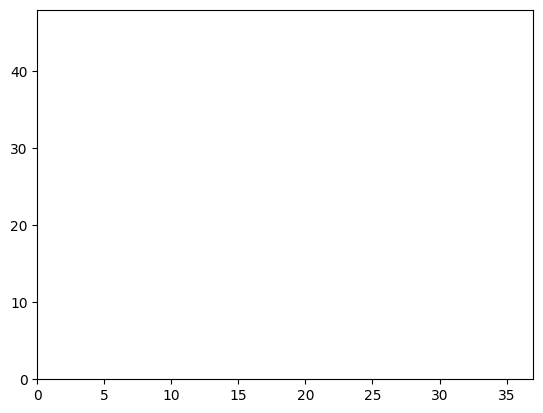

In [7]:
plt.pcolormesh(interp_result)

<Axes: xlabel='xs', ylabel='ys'>

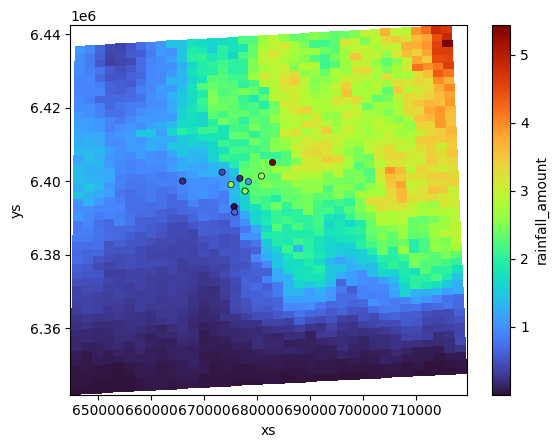

In [17]:
plg.plot_map.plot_plg(
    da_grid=ds_rad.rainfall_amount.sum(dim='time'),
    da_gauges=ds_gauges.rainfall_amount.sum(dim='time'), use_lon_lat=False)